# Compare Different Types of Co-Precessing Frames

**Summary**: There are different types of co-precessing frames. Here we compare them to gain intuition about which is of best use for a given problem.

* Find simultion using keyword 
* Load multipoles from simulation 
* Compute co-precessing frames
    * Time domain (strain/psi4)     
    * Frequency domain (strain/psi4)
* For each compare time and frequency domain waveforms

## Setup Environment

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Setup plotting backend
from matplotlib.pyplot import *
# Import nrutils
from nrutils import sc_add,scsearch,gwylm
from nrutils.manipulate.rotate import gwylm_radiation_axis_workflow
from numpy import *
from positive import *

(positive)>> Applying custom matplotlib settings.


## Load a Waveform

In [210]:
# A = scsearch(keyword='q8a08t120',verbose=True)
A = scsearch(keyword='q8a08t150dP2_T_120_480',verbose=True)
# A = scsearch(keyword='q8a04t60D_dPm1',verbose=True)
# A = scsearch(keyword='q1a08t120',verbose=True)
# A = scsearch(keyword='q4a04t150_T_96_360',verbose=True)
# A = scsearch(keyword='q2_a10_a28_ph0_th150',verbose=True)

(scsearch)>> Found keyword (=q8a08t150dP2_T_120_480) keyword.
(scsearch)>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
## Found 1 possibly degenerate simulations:
[0001][hogshead] q8precessing: 1chi0.80-p-q8.00	(q8a08t150dP2_T_120_480)



### The waveform is loaded in its simulation frame

In [211]:
y_raw = gwylm( A[0], lmax=2, verbose=False, clean = True, dt=0.5,pad=1000 )


# -~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~ #
(load_dynamics)>> Trying to load source dynamics ...
# -~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~ #

(load_dynamics)>> Calculating dynamics times by adjusting input waveform_times by extraction radius
(load_dynamics)>> Retrieving method from handler for loading source dyanmics as this is specific to BAM, GT-MAYA, SXS, etc ...
(load_dynamics)>> Loading/Learning dynamics ...
(straighten_wfarr!)>> The time series has been found to be non-monotonic. We will sort the data to enforce monotinicity.
(straighten_wfarr!)>> The waveform time series is now monotonic.
(straighten_wfarr!)>> Repeated time values were found in the array. Offending rows will be removed.
(straighten_wfarr!)>> The time series has been found to be non-monotonic. We will sort the data to enforce monotinicity.
(straighten_wfarr!)>> The waveform time series is now monotonic.
(straighten_wfarr!)>> Repeated time values were found in the arr

## Plot effect of different frames on BH trajectories
NOTE that this is a bit odd since frame rotations are based on radiative quantities (guage invariant), while trajectories are guage dependent

### J-initial frame
* This happens to assist with further rotations
* The order of operations can matter when computing different frames for basic ease-of-processing reasons

In [212]:
# Define dictionary to hold various frames
frame = {'raw':y_raw}

In [213]:
frame['ji'] = frame['raw'].__calc_initial_j_frame__(use_dynamics=False,verbose=True)

(__calc_initial_j_frame__)>> Using bbh data for initial J.
(__rotate_frame_at_all_times__)>> Transforming to the coprecessing frame using TD angles.
(__rotate_frame_at_all_times__)>> Attempting to rotate dynamics timeseries in this.dynamics
(__rotate_frame_at_all_times__)>> Note that metadata at the scentry level (i.e. this.__scentry__) have not been rotated, but this.Sf, this.R1 and others have been rotated. This includes radiated and remnant quantities.


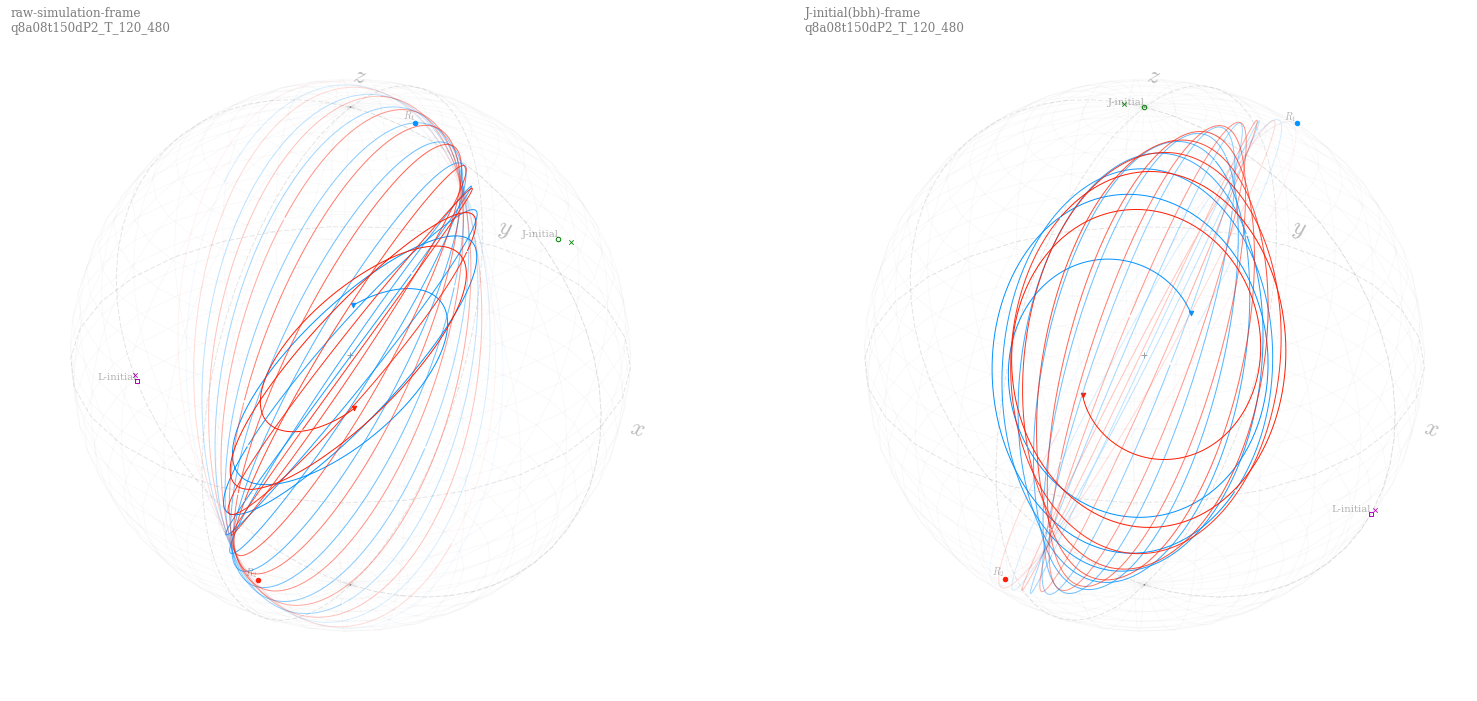

In [214]:
from mpl_toolkits.mplot3d import Axes3D

fig = figure(figsize=3*figaspect(0.46))

# Plot BH tracks in initial simulation frame
ax = fig.add_subplot(121,projection='3d')
ax = frame['raw'].plot_3d_trajectory(ax=ax,show_initials=True,legend_on=False)
title(frame['raw'].frame+'-frame'+'\n'+frame['raw'].simname,size=12,alpha=0.5,loc='left')

# Plot BH tracks in the frame chosen above
ax = fig.add_subplot(122,projection='3d')
ax = frame['ji'].plot_3d_trajectory(ax=ax,show_initials=True,legend_on=False)
title(frame['ji'].frame+'-frame'+'\n'+frame['ji'].simname,size=12,alpha=0.5,loc='left');

### Visualize the system's radiation axis 
* all optimal emission tracks $\hat{V}$ should be consistent with the dynamics $\vec{L}$
* in the frequency domain, positive and negative frequency bands of $\hat{V}$ should approximately overlap
* any deviation from the points above signals a processing error
* frequency domain tracks may show a lot of noise at low frequencies; this is not a processing error, bu a plotting artifact 

In [ ]:
foo = frame['ji'].get_radiation_axis_info(kind='psi4')

(calc_coprecessing_angles)>> The domain values seem unevenly split between positive and negative values. Thus, we will interpret the input as corresponding to TIME DOMAIN data.


In [ ]:

fig = figure(figsize=3*figaspect(0.46))

# 
ax = fig.add_subplot(121,projection='3d')
foo.plot_radiation_axis_on_sphere(domain='time',ax=ax)
# ax.get_legend().remove()

# 
ax = fig.add_subplot(122,projection='3d')
foo.plot_radiation_axis_on_sphere(domain='freq',ax=ax)
ax.get_legend().remove()


### Co-precessing frame

In [ ]:
# Compute co-precessing frame (using time domain psi4)
frame['cp-td-y'] = frame['ji'].__calc_coprecessing_frame__(transform_domain='td',kind='psi4')

In [ ]:
# Plot effect on trajectories

from mpl_toolkits.mplot3d import Axes3D

fig = figure(figsize=3*figaspect(0.46))

# Plot BH tracks in initial simulation frame
ax = fig.add_subplot(121,projection='3d')
ax = frame['raw'].plot_3d_trajectory(ax=ax,show_initials=True,legend_on=False)
title(frame['raw'].frame+'-frame'+'\n'+frame['raw'].simname,size=12,alpha=0.3,loc='left')

# Plot BH tracks in the frame chosen above
ax = fig.add_subplot(122,projection='3d')
ax = frame['cp-td-y'].plot_3d_trajectory(ax=ax,show_initials=True,legend_on=False)
title(frame['cp-td-y'].frame+'-frame'+'\n'+frame['cp-td-y'].simname,size=12,alpha=0.3,loc='left');

## Compute and compare various co-precessing frame waveforms

In [ ]:

# Use Time Domain Strain 
frame['cp-td-h'] = frame['ji'].__calc_coprecessing_frame__(transform_domain='td',kind='strain',verbose=True)

# Use Time Domain Pis4
frame['cp-td-y'] = frame['ji'].__calc_coprecessing_frame__(transform_domain='td',kind='psi4',verbose=True)

# Use Frequency Domain Strain 
frame['cp-fd-h'] = frame['ji'].__calc_coprecessing_frame__(transform_domain='fd',kind='strain',verbose=True)

# Use Frequency Domain Psi4
frame['cp-fd-y'] = frame['ji'].__calc_coprecessing_frame__(transform_domain='fd',kind='psi4',verbose=True)


### Compare time domain waveforms

In [ ]:

figure( figsize=3*figaspect(2*0.35) )

l,m = 2,2

subplot(2,1,1)

for k in frame:
    if 'cp' in k:
        plot( frame[k].t, frame[k][l,m]['strain'].amp, label=k.replace('y','$\psi_4$') )
    
xlim( frame[k].t[frame[k].startindex], frame[k].t[frame[k].endindex] )
legend()
title(frame[k].simname,alpha=0.5,size=16,loc='left')
ylabel('$|h_{%i%i}|$'%(l,m));
# yscale('log'); ylim(1e-4,0.5e0)

subplot(2,1,2)

for k in frame:
    if 'cp' in k:
        # plot( frame[k].t, frame[k][2,2]['strain'].phi, label=k.replace('y','$\psi_4$') )
        plot( frame[k].t, (frame[k][2,2]['strain'].y*exp(-1j*frame[k][2,2]['strain'].phi[frame[k][2,2]['strain'].k_amp_max])).real, label=k.replace('y','$\psi_4$') )

xlim( frame[k].t[frame[k].startindex], frame[k].t[frame[k].endindex] )
legend()
xlabel('$t/M$')
ylabel('$h_{%i%i}^{(+)}$'%(l,m));

### Compare cp-frame frequency domain waveforms

In [ ]:

figure( figsize=3*figaspect(2*0.4) )

l,m = 2,2
k_ref='cp-fd-h'

subplot(2,1,1)

for k in frame:
    if 'cp' in k:
        plot( abs(frame[k].f), frame[k][l,m]['strain'].fd_amp, label=k.replace('y','$\psi_4$'), alpha=0.4 if 'td' in k else 1 )
    
xscale('log'); yscale('log')
ylim( 1e-5, 1e2 )
xlim( lim(frame[k_ref].f[frame[k_ref].f>0]) )
legend()
ylabel('$|h_{%i%i}|$'%(l,m))
title(frame[k_ref].simname,alpha=0.5,size=16,loc='left')
xlabel('$|f|M$')

subplot(2,1,2)


for k in frame:
    if 'cp' in k:
        plot( frame[k].f, frame[k][l,m]['psi4'].fd_dphi, label=k.replace('y','$\psi_4$') )
    

x1,x2 = 0.015,0.12
mask = (frame[k_ref].f>x1) & (frame[k_ref].f<x2)
xlim(x1,x2 )
ylim( lim( frame[k_ref][l,m]['psi4'].fd_dphi[mask], dilate=0.1 ) )
xscale('log');
legend()
xlabel('$fM$')
ylabel(r'$\frac{d}{df}{\arg(\psi_{%i%i})}$'%(l,m))

tight_layout()

## Compare multipole FD amplitudes between frames

In [ ]:

fig,ax = subplots(2,3,figsize=4*figaspect(0.618))
ax = ax.flatten()

k = 'cp-fd-y'
for j,k in enumerate(frame):
    
    sca(ax[j])

    ls = [':','--','-']; z=0
    for l,m in sorted(frame[k].lm,reverse=False):
        if m>=0:
            loglog( frame[k].f, frame[k][l,m]['strain'].fd_amp, lw=1, alpha=0.2, color='k', label=str((l,m)),ls=ls[z] ) 
            z+=1
    for l,m in sorted(frame[k].lm,reverse=False):
        if m<=0:
            loglog( -frame[k].f, frame[k][l,m]['strain'].fd_amp, label=str((l,m)) ) 
    ylim([1e-5,1e2])
    legend(ncol=2)
    xlabel('$fM$')
    title(k+', '+frame[k].simname,alpha=0.5,size=16)
    xlim(1e-3,3e-1)
    ylabel('$|h_{\ell m}|$');
